<a href="https://colab.research.google.com/github/hmarathe420/Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - Car Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe

## **Project Summary -**

The project "Car Price Prediction" aims to develop and deploy machine learning models to predict the prices of cars based on various features. The project follows a comprehensive approach that encompasses data collection, data understanding, data cleaning, data preprocessing, exploratory data visualization, feature scaling, handling outliers and null values, implementing three different regression models (Random Forest Regressor, XGB Regressor, Linear Regression), performing cross-validation, and hyperparameter tuning for each algorithm.


**Project Steps:**

Data Collection and Understanding:
The initial step involved gathering a dataset containing car-related information, including features like mileage, brand, fuel type, year, etc. This dataset is essential for training and evaluating the models. Understanding the dataset's structure, variables, and potential relationships between them is crucial for meaningful predictions.

* Data Cleaning and Preprocessing:
Data cleaning addressed issues like missing values, duplicated entries, and inconsistent formats. Preprocessing involved transforming and encoding categorical variables, scaling numerical features, and splitting the dataset into features (X) and target variable (y).

* Data Visualization:
Exploratory data visualization provided insights into the distribution of car prices, relationships between features, and patterns in the data. Visualizations included histograms, scatter plots, box plots, and correlation matrices.

* Data Scaling and Preprocessing:
To prepare the data for modeling, the numerical features were scaled using the Min-Max Scaler to ensure uniformity and improve convergence speed of algorithms.

* Handling Outliers and Null Values:
Outliers were identified and either clipped or transformed, ensuring they don't significantly impact model training. Null values were addressed through imputation or removal, depending on the feature's importance.

* Machine Learning Model Implementation:
Three regression models were implemented: Random Forest Regressor, XGB Regressor, and Linear Regression. Each model learned patterns in the data to predict car prices.

* Cross Validation and Hyperparameter Tuning:
Cross-validation ensured robustness by assessing model performance on different subsets of data. Hyperparameter tuning using techniques like GridSearchCV optimized model parameters for better accuracy.

## **GitHub Link -**

GitHub Link --> [Tap Here](https://github.com/hmarathe420/Car_Price_Prediction/tree/main)

## **Problem Statement**


As an aspiring data scientist, my task is to develop a machine learning model that accurately predicts the prices of cars based on various attributes and features. The goal of this project is to create a predictive model that assists potential buyers and sellers in estimating the fair market value of a car, considering factors such as its make, model, mileage, year of manufacture, fuel type, and more.

## **Data Collection & Understanding**

In [141]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


In [47]:
# Mounting Google Drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# loading dataset from drive
df = pd.read_csv("/content/drive/MyDrive/Car Price Prediction InternPe/quikr_car.csv")

In [49]:
# Top 5 rows of diabetes dataset
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [50]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [51]:
# Describing the dataset
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [52]:
# shape of dataset
df.shape

(892, 6)

In [53]:
# number of duplicated rows of dataset
df.duplicated().sum()

94

In [54]:
# null values in dataset
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


  * The dataset contains a total of 892 rows and 6 columns. Each row represents a car entry, and there are 892 cars in total. The dataset has been organized with 6 different pieces of information for each car.


* Within the dataset, you've identified that there are 94 duplicated entries. This means that some cars are listed multiple times in your dataset, and you might need to investigate or handle these duplicates to ensure data accuracy.

Column Names:
The dataset columns have the following names:

* name: This column likely contains the name or model of the car.
* company: This column likely contains the company that manufactures the car.
* year: This column contains the year of manufacture for each car.
* Price: This column contains the price of each car.
* kms_driven: This column contains the distance the car has been driven (in kilometers).
* fuel_type: This column indicates the type of fuel the car uses (e.g., petrol, diesel, etc.).
* Null Values:

I've found that there are null values present in the kms_driven column, with a count of 52. This means that there are 52 cars in the dataset for which the information about the distance they've been driven is missing or not available.

Fuel Type Information:
There are 55 cars for which the information about the fuel type is not provided.

In summary, we can say that the dataset contains information about 892 cars. It has columns indicating the name, company, year of manufacture, price, kilometers driven, and fuel type for each car. There are some duplicated entries that need to be addressed. Additionally, the kms_driven column has 52 missing values, and the fuel_type column has 55 missing values.

## Data Cleaning & Pre-Processing

In [55]:
# Removing Kmssuffix from the kms_driven column values
for i in df['kms_driven']:
  if type(i) != float:
    kms = i.split(" ")[0]
    df['kms_driven'] = df['kms_driven'].replace(i, kms)

  else:
    pass

In [56]:
# replacing petrol with 0
df['kms_driven'] =df['kms_driven'].replace('Petrol', 0)

In [57]:
# replacing nul values with 0
df['kms_driven'] =df['kms_driven'].replace(np.nan, 0)

In [58]:
# removing comma from the text values in kms_driven column
for i in df['kms_driven']:
  if type(i)== str:
    x = i.replace(',','')
    y = int(x)
    df['kms_driven'] = df['kms_driven'].replace(i,y)

In [59]:
# converting kms_driven datatype with int
df['kms_driven'] = df['kms_driven'].astype(int)

In [60]:
# replacing
df['kms_driven'] =  df['kms_driven'].replace(0,  df['kms_driven'].mean())

In [61]:
# replacing null or 0 with mean in kms_driven column
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven     0
fuel_type     55
dtype: int64

In [62]:
# Removing null values from the dataset
df.dropna(inplace = True)

In [63]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [64]:
df.duplicated().sum()

92

In [65]:
# Removing duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [66]:
df.duplicated().sum()

0

In [67]:
# Replacing ask for price with 0
df['Price'] = df['Price'].replace('Ask For Price', 0)

In [68]:
# Converting datatype of price column from object to int
for i in df['Price']:
  if type(i) != int:
    x = i.replace(",","")
    y = int(x)
    df['Price'] = df['Price'].replace(i,y)

In [69]:
# Converting datatype of target variable
df['Price'] = df['Price'].astype(int)

In [70]:
# Replacing 0 or null value with mean of target column
df['Price'] = df['Price'].replace(0,df['Price'].mean())

In [71]:
# converting datatype of year column
df['year'] = df['year'].astype(int)

## **EDA - Data Visualization**

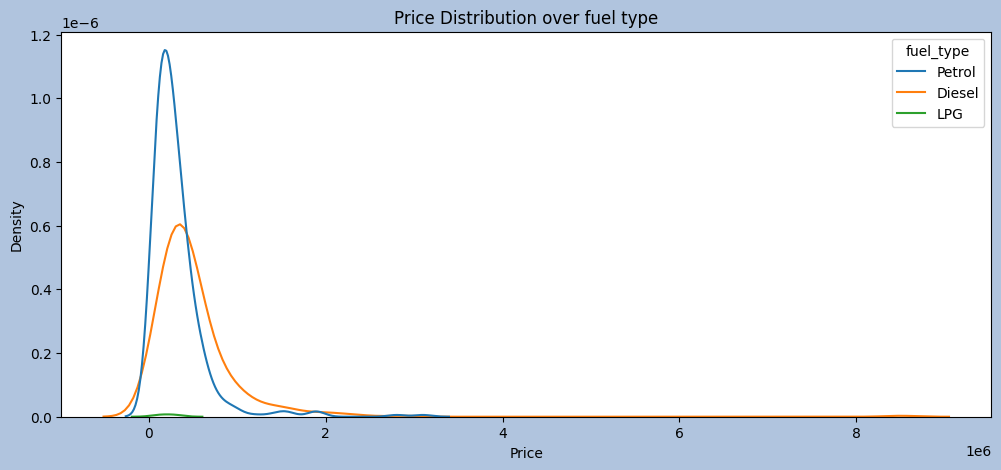

In [27]:
# ploting price distribution plot with fuel type
plt.figure(figsize = (12,5), facecolor = 'lightsteelblue')
sns.kdeplot(data =df , x = 'Price', hue = 'fuel_type')
plt.title("Price Distribution over fuel type")
plt.plot()
plt.show()

I've visualized the distribution of car prices based on different fuel types. This helps us understand how prices vary for different fuel categories. You might observe whether there are significant price differences between cars using different fuel types. It can also indicate which fuel type is more prevalent in the dataset.

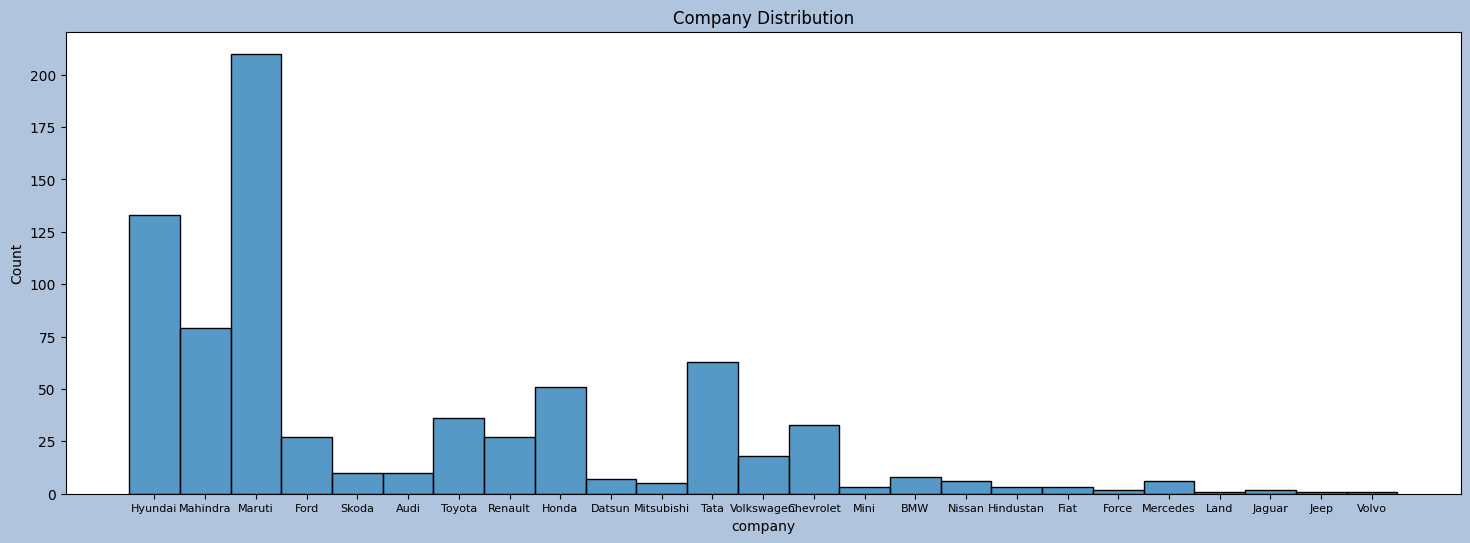

In [28]:
# Company Distribution using histplot
plt.figure(figsize = (18,6), facecolor = 'lightsteelblue')
sns.histplot(data = df , x ='company')
plt.title("Company Distribution")
plt.xticks(fontsize=8)
plt.show()

By creating a histogram or a count plot of car companies, you've gained insights into the distribution of car brands in your dataset. This can help you identify the dominant car manufacturers and also indicate if your dataset is skewed towards certain brands.

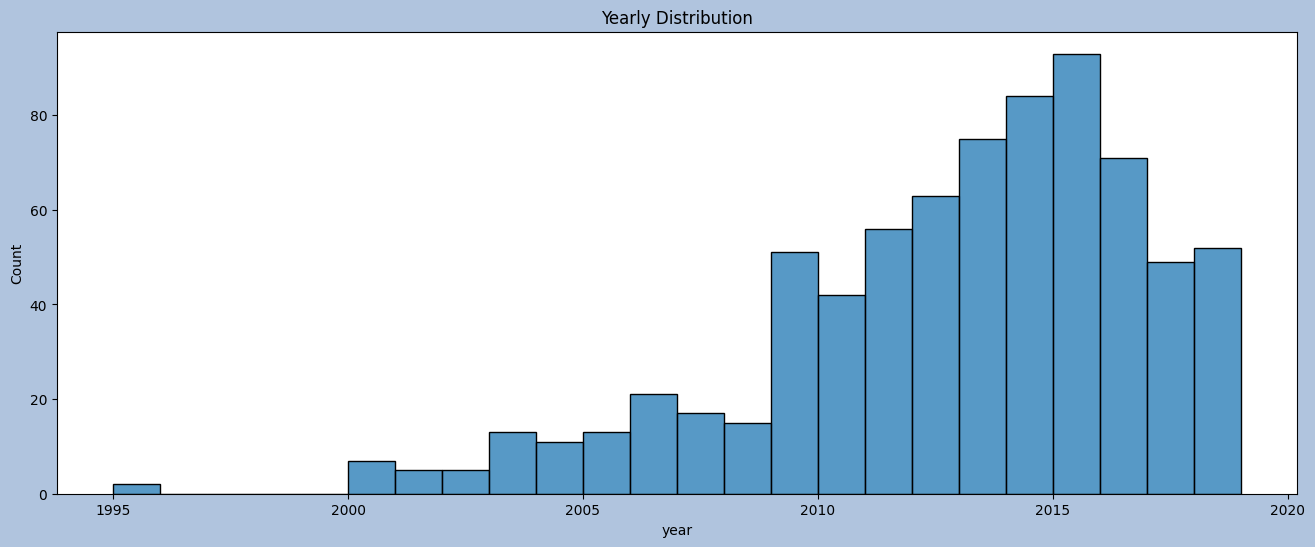

In [37]:
# Yearly distribution
plt.figure(figsize = (16,6), facecolor = 'lightsteelblue')
sns.histplot(data = df , x =  'year', binwidth= 1)
plt.title("Yearly Distribution")
plt.plot()
plt.show()

I've possibly created a histogram or KDE plot to visualize the distribution of cars over different years. This can help you identify trends in car manufacturing years, whether certain years have more representation, and potentially spot any outliers or unusual years.

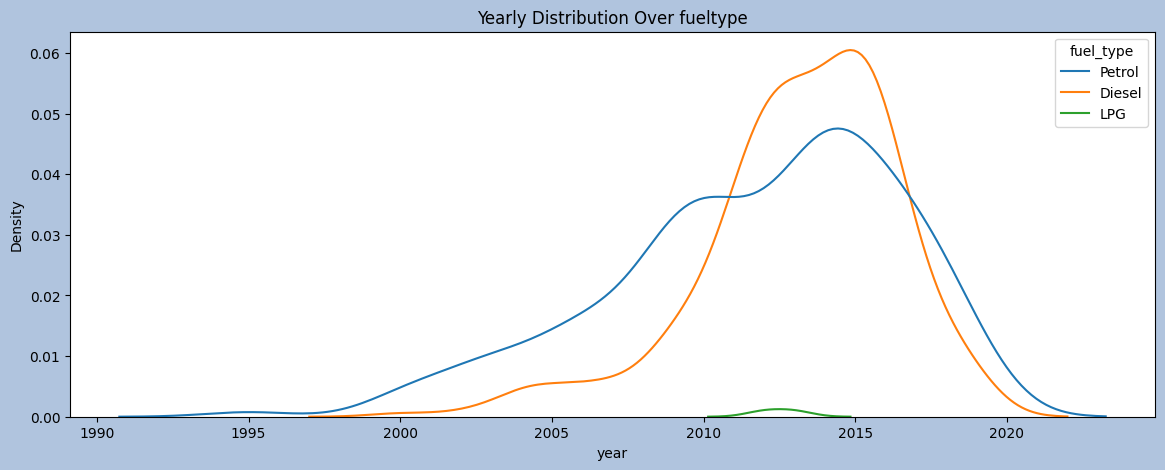

In [30]:
# ploting graph for yearly distribution with fueltype
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.kdeplot(data = df , x = 'year', hue = 'fuel_type')
plt.title("Yearly Distribution Over fueltype")
plt.plot()
plt.show()

By overlaying KDE plots for different fuel types on a common axis, you've likely visualized how the yearly distribution of cars varies between fuel types. This could reveal whether certain fuel types are more common in specific years or if the distribution is similar across fuel types.

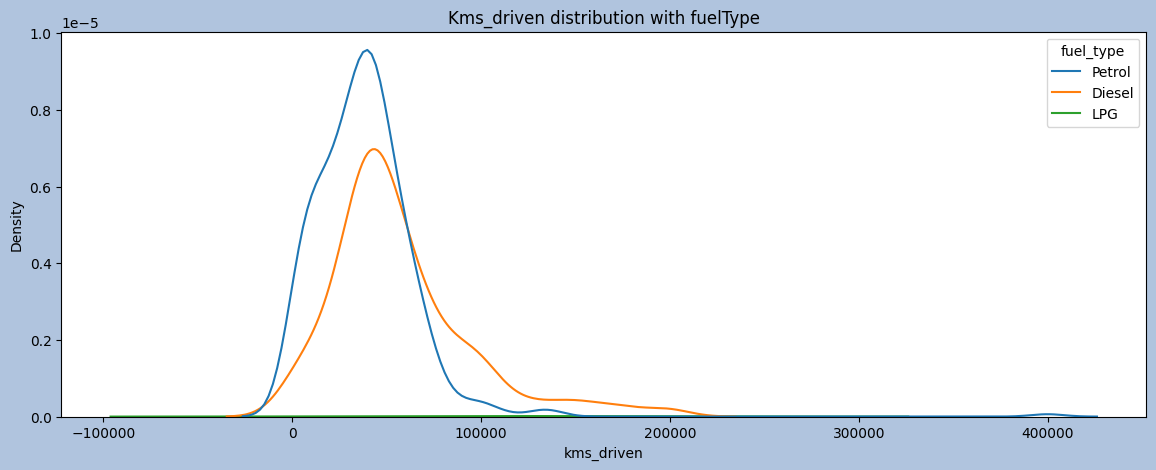

In [31]:
# ploting kde plot for distribution of kms driven with fuel type.
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.kdeplot(data = df , x = 'kms_driven', hue = 'fuel_type')
plt.title("Kms_driven distribution with fuelType")
plt.plot()
plt.show()

Creating KDE plots for kilometers driven based on fuel type allows you to understand how driving distances are distributed for different fuel types. This can help identify any trends or patterns in how different fuel types are used and how much they're driven.

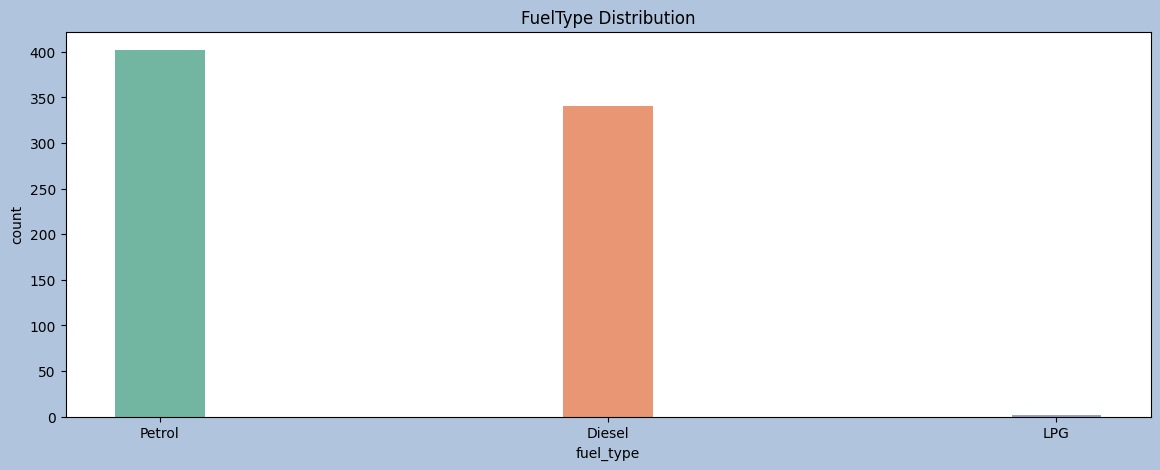

In [32]:
# Ploting countplot for fueltype distribution
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.countplot(data = df , x = 'fuel_type',palette="Set2", width = 0.2)
plt.title("FuelType Distribution")
plt.plot()
plt.show()

Visualizing the distribution of fuel types using a count plot provides insights into the prevalence of each fuel type in the dataset. This information can be valuable for understanding the dataset's composition and identifying any potential biases.

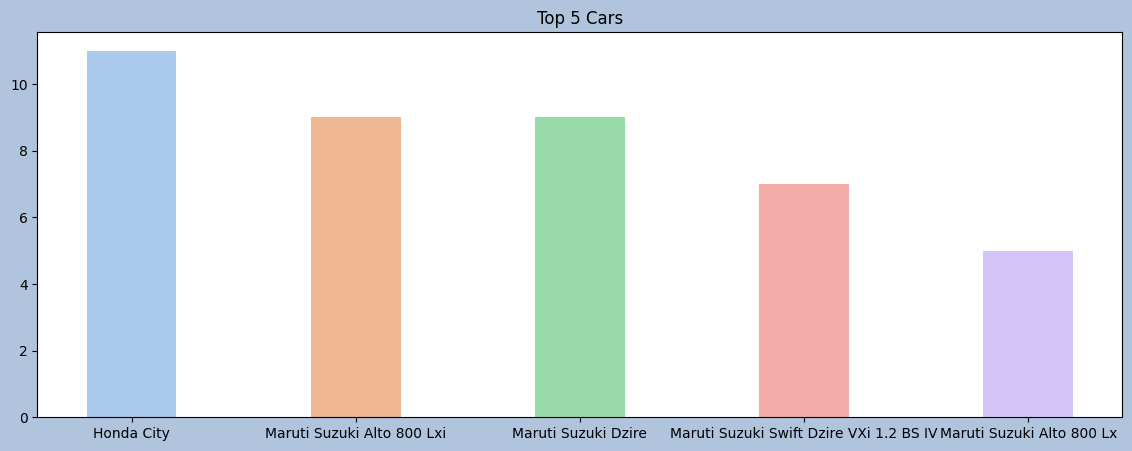

In [33]:
# Ploting Top 5 occuring cars
car_name = pd.DataFrame(df['name'].value_counts()).reset_index().sort_values(by ='name', ascending = False).head(5)['index'].values
freq = pd.DataFrame(df['name'].value_counts()).reset_index().sort_values(by ='name', ascending = False).head(5)['name'].values
plt.figure(figsize = (14,5), facecolor = 'lightsteelblue')
sns.barplot(x = car_name, y = freq, width= 0.4, palette="pastel")
plt.title("Top 5 Cars")
plt.plot()
plt.show()

Identifying and visualizing the top 5 cars based on a certain criterion (e.g., price, popularity) can provide a quick overview of the most significant cars in the dataset. This helps in understanding the most influential factors and car models.

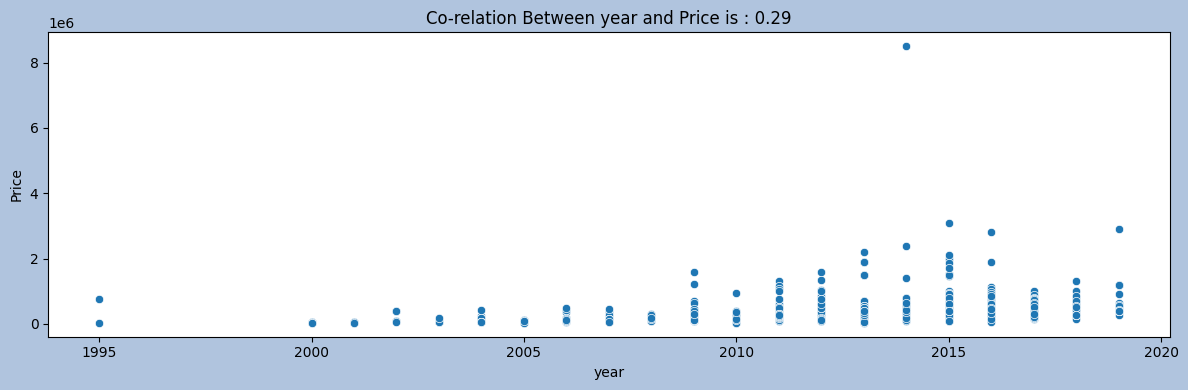

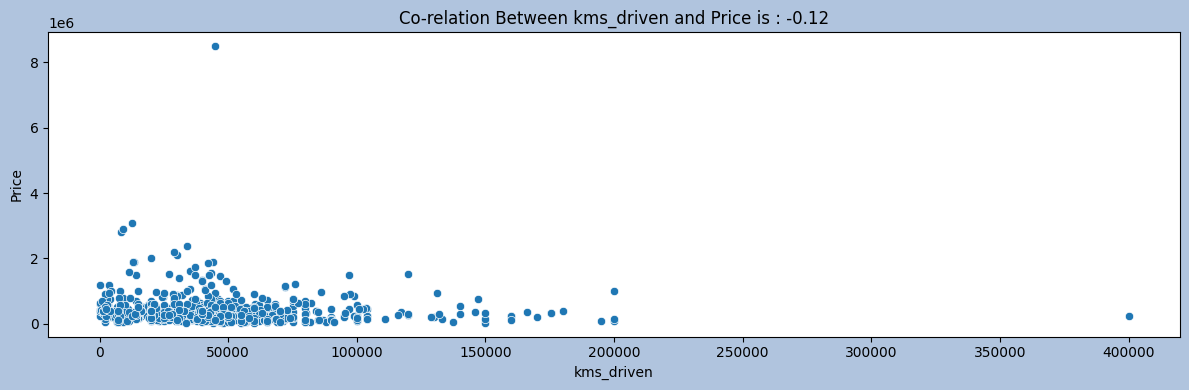

In [34]:
# ploting the scatterplot for checking the co-relation with target variable
for col in ['year','kms_driven']:
  plt.rcParams['figure.autolayout'] == True
  plt.figure( figsize = (12,4),facecolor = 'lightsteelblue')
  sns.scatterplot(x = df[col], y = df['Price'])
  accuracy = round(np.corrcoef(df[col],df['Price'])[0][1],2)
  plt.title(f"Co-relation Between {col} and Price is : {accuracy}")
  plt.tight_layout()
plt.show()

By creating scatter plots between two variables (e.g., price and kms_driven), i've explored the relationship between them. Scatter plots can reveal patterns, trends, and potential correlations. A positive correlation would show that as one variable increases, the other tends to increase, and vice versa for a negative correlation.

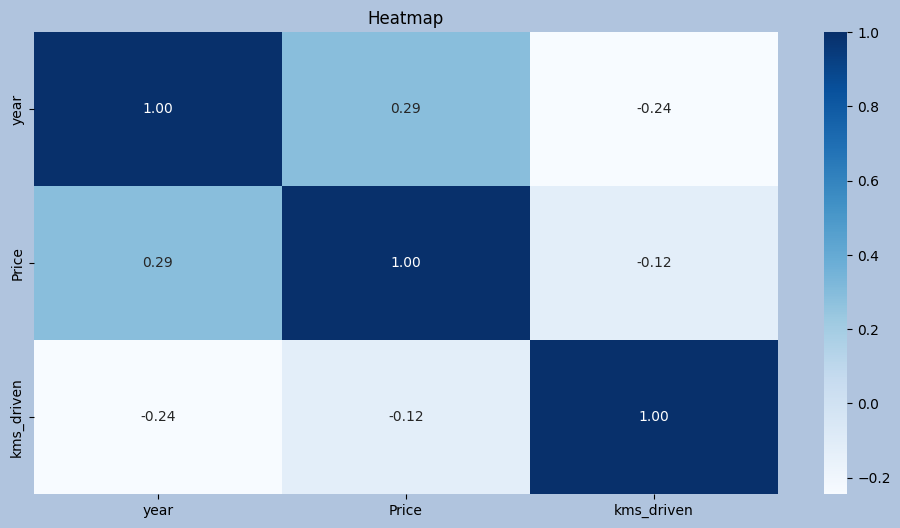

In [35]:
# ploting heat map for getting the corelation of each variable with each other
plt.figure( figsize = (12,6),facecolor = 'lightsteelblue')
sns.heatmap(df.corr(),annot =True,cmap= 'Blues', fmt=".2f")
plt.title("Heatmap")
plt.plot()
plt.show()

The heatmap is a visual representation of the correlation matrix between numerical variables in your dataset. It helps you identify which variables are strongly correlated, which can guide feature selection and understand potential multicollinearity issues in your predictive models.

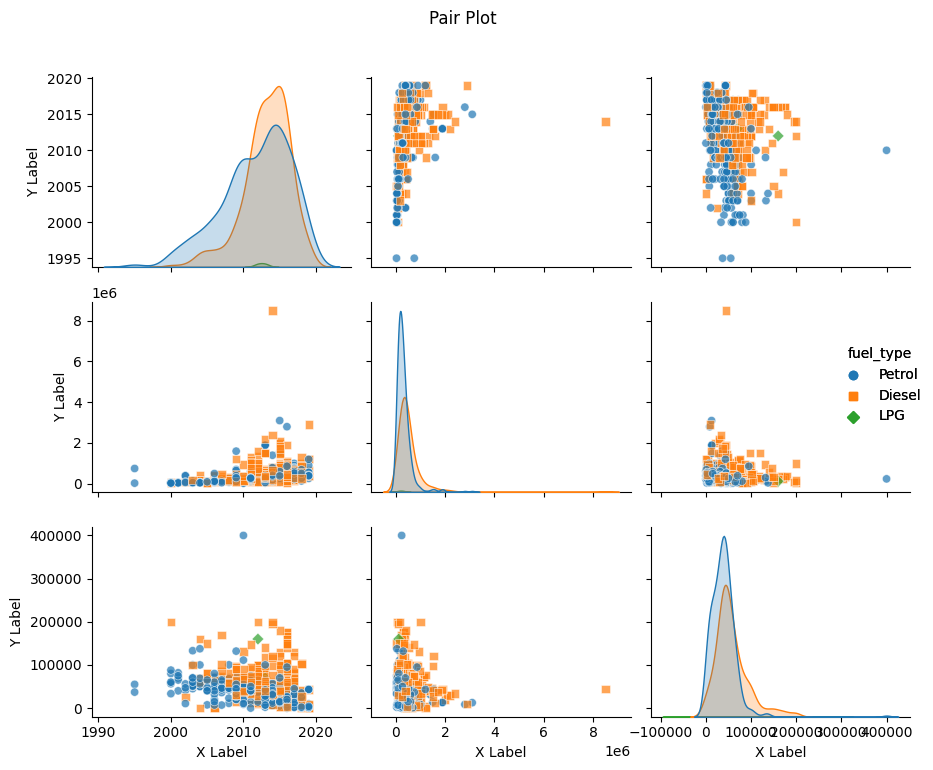

In [36]:
# Create a pair plot using seaborn
pairplot = sns.pairplot(df,
                        hue="fuel_type",
                        markers=["o", "s", "D"],
                        diag_kind="kde",
                        diag_kws={"shade": True},
                        plot_kws={"alpha": 0.7},
                        )

# Customize the titles and labels
pairplot.fig.suptitle("Pair Plot", y=1.02)
pairplot.set(xlabel="X Label", ylabel="Y Label")

# Customize the legend
pairplot.add_legend()

plt.tight_layout()
plt.show()

The pair plot provides a matrix of scatter plots, allowing you to visualize relationships between multiple pairs of variables simultaneously. This is especially useful for understanding complex interactions and correlations between features.

In summary, The EDA provides a comprehensive overview of the dataset, including price distributions, fuel type distributions, correlations, and relationships among variables. These visualizations help uncover patterns and insights that can guide feature engineering, model selection, and further analysis in your car price prediction project.

## **Data Pre-Processing and Feature Selection**

In [75]:
# Performing one hot encoding on company column
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'company' column
df['company'] = label_encoder.fit_transform(df['company'])

In [83]:
# transforming categorical variable into numerical variable
df['fuel_type'] = df['fuel_type'].replace('Petrol',0)
df['fuel_type'] = df['fuel_type'].replace('Diesel',1)
df['fuel_type'] = df['fuel_type'].replace('LPG',2)

In [88]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,9,2007,80000.000000,45000.0,0
1,Mahindra Jeep CL550 MDI,13,2006,425000.000000,40.0,1
2,Maruti Suzuki Alto 800 Vxi,14,2018,391878.424161,22000.0,0
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,9,2014,325000.000000,28000.0,0
4,Ford EcoSport Titanium 1.5L TDCi,6,2014,575000.000000,36000.0,1


In [90]:
# Select the predictor variables (independent variables) for which you want to calculate VIF
X = df[['company','year','kms_driven','fuel_type']]
# Calculate VIF scores
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

pd.DataFrame(vif)

,Variable,VIF
0,company,6.384088
1,year,7.314918
2,kms_driven,3.145760
3,fuel_type,2.033049


**Handling Outliers :**

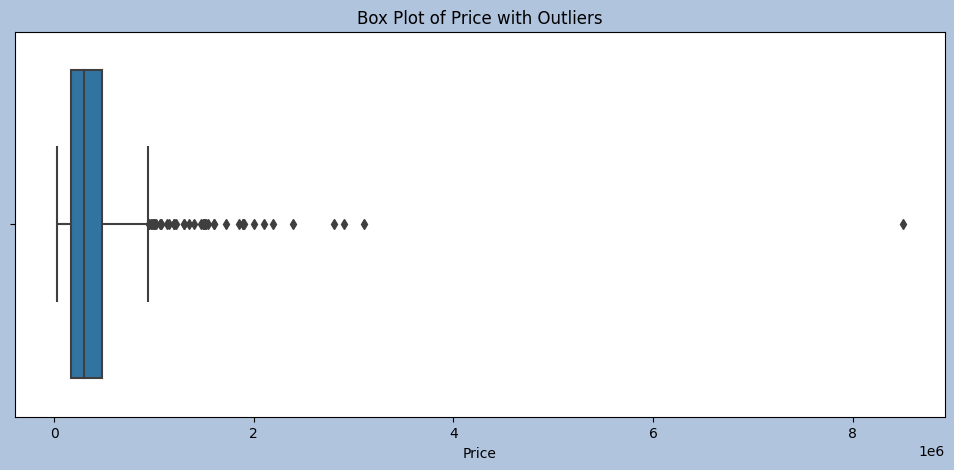

In [96]:
# Visualizing outliers in price column
plt.figure(figsize = (12,5), facecolor = 'lightsteelblue')
sns.boxplot(data=df, x='Price')
plt.title("Box Plot of Price with Outliers")
plt.xlabel("Price")
plt.show()

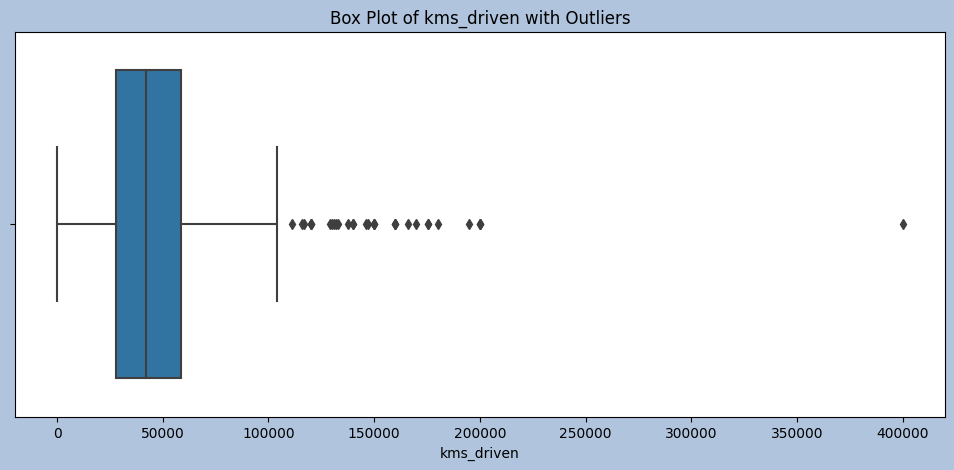

In [98]:
# ploting the outliers of kms_Driven
plt.figure(figsize = (12,5), facecolor = 'lightsteelblue')
sns.boxplot(data=df, x='kms_driven')
plt.title("Box Plot of kms_driven with Outliers")
plt.xlabel("kms_driven")
plt.show()

In [100]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]


In [101]:
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [102]:
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_price = df[(df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)]

Q1_kms = df['kms_driven'].quantile(0.25)
Q3_kms = df['kms_driven'].quantile(0.75)
IQR_kms = Q3_kms - Q1_kms

lower_bound_kms = Q1_kms - 1.5 * IQR_kms
upper_bound_kms = Q3_kms + 1.5 * IQR_kms

outliers_kms = df[(df['kms_driven'] < lower_bound_kms) | (df['kms_driven'] > upper_bound_kms)]


In [103]:
df['Price'] = df['Price'].clip(lower_bound_price, upper_bound_price)
df['kms_driven'] = df['kms_driven'].clip(lower_bound_kms, upper_bound_kms)


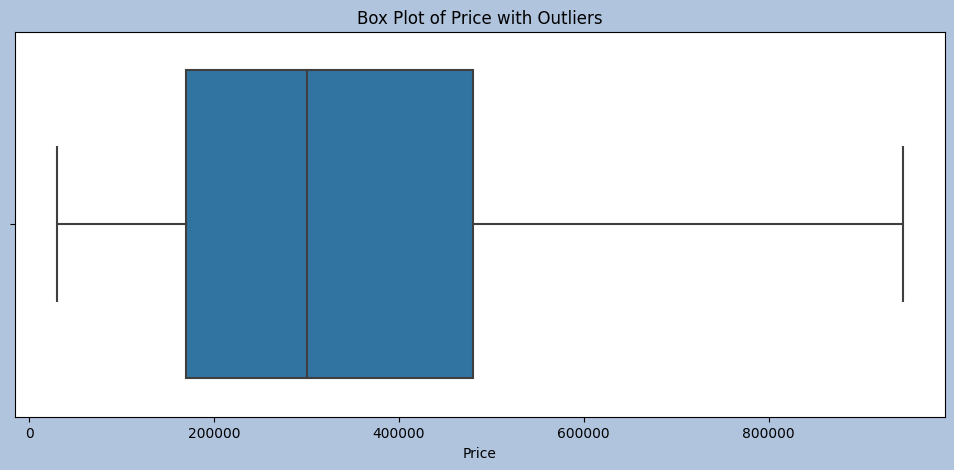

In [104]:
# Visualization after handiling outliers
plt.figure(figsize = (12,5), facecolor = 'lightsteelblue')
sns.boxplot(data=df, x='Price')
plt.title("Box Plot of Price after handling outliers")
plt.xlabel("Price")
plt.show()

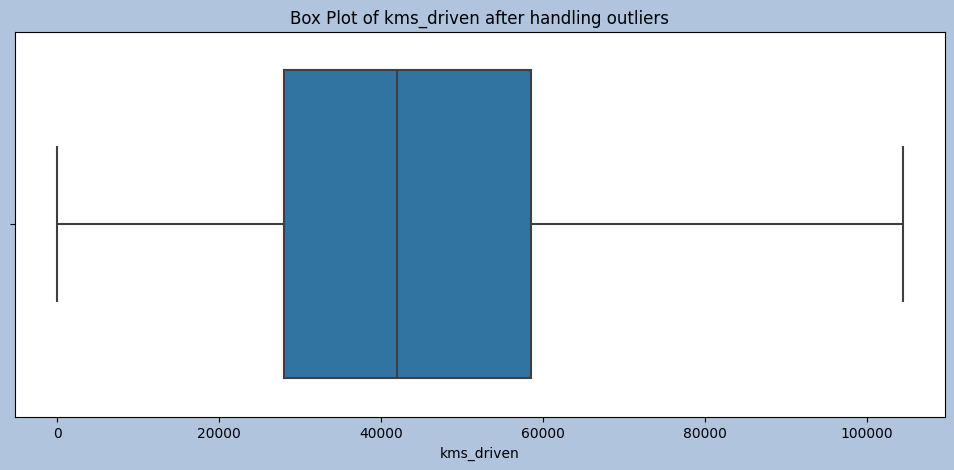

In [105]:
# Visualization after handiling outliers
plt.figure(figsize = (12,5), facecolor = 'lightsteelblue')
sns.boxplot(data=df, x='kms_driven')
plt.title("Box Plot of kms_driven after handling outliers")
plt.xlabel("kms_driven")
plt.show()

**Data Splitting :**

In [109]:
# defining dependent and independent variables
x = df.drop(columns=['Price','name'])
y = df['Price']

In [111]:
# Split the data into trainingm and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# Print the sizes of the sets
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (596, 4) (596,)
Test set: (149, 4) (149,)


## **Machine Learning**

### Model 1 - Random Forest Regressor

In [124]:
# Defining the print_evaluate function for printing the metrics of ml model
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print("_________________________________")
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [117]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [119]:
# making prediction on training and testing dataset
train_pred  = rf_model.predict(x_train)
test_pred = rf_model.predict(x_test)

In [125]:
# Model Performance on Training dataset
print("Model performance on Training Dataset")
print_evaluate(y_train,train_pred)
# Model performance on Testing Dataset
print("Model performance on Testing Dataset")
print_evaluate(y_test,test_pred)

Model performance on Training Dataset
_________________________________
MAE: 47088.48608867412
MSE: 4440346462.718227
RMSE: 66635.92471571342
R2 Square 0.9227158822290812
__________________________________
Model performance on Testing Dataset
_________________________________
MAE: 131068.3510952712
MSE: 31293259121.29702
RMSE: 176899.0082541364
R2 Square 0.5247178572956313
__________________________________


**Cross Validation and Hyperparameter Tunning :**

In [127]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-cv_scores.mean()) ** 0.5
print("Cross-Validation RMSE:", rmse_cv)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the testing data
y_pred = best_rf_model.predict(x_test)
rmse_best = mean_squared_error(y_test, y_pred) ** 0.5
print("Best Model RMSE:", rmse_best)

Cross-Validation RMSE: 173285.8228071961
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model RMSE: 171308.0461314783


In [129]:
# making prediction on training and testing dataset using best_rf_model
train_pred  = best_rf_model.predict(x_train)
test_pred = best_rf_model.predict(x_test)

In [130]:
# Model Performance on Training dataset
print("Model performance on Training Dataset")
print_evaluate(y_train,train_pred)
# Model performance on Testing Dataset
print("Model performance on Testing Dataset")
print_evaluate(y_test,test_pred)

Model performance on Training Dataset
_________________________________
MAE: 77600.77470246177
MSE: 11394548963.896305
RMSE: 106745.25265273536
R2 Square 0.8016781637500469
__________________________________
Model performance on Testing Dataset
_________________________________
MAE: 130323.49968250318
MSE: 29346446669.384697
RMSE: 171308.0461314783
R2 Square 0.5542860524779196
__________________________________


### Model 2 - XGBRegressor

In [131]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the training and testing data
train_pred = xgb_model.predict(x_train)
test_pred = xgb_model.predict(x_test)


In [133]:
# Model performance on training and testing dataset
print("Model Performance on Training Dataset")
print_evaluate(y_train,train_pred)
print("Model Performance on Testing Dataset")
print_evaluate(y_test,test_pred)

Model Performance on Training Dataset
_________________________________
MAE: 51663.06448701283
MSE: 5417796633.803888
RMSE: 73605.68343412
R2 Square 0.9057033867466577
__________________________________
Model Performance on Testing Dataset
_________________________________
MAE: 118030.15610804412
MSE: 27423940040.95974
RMSE: 165601.75132213952
R2 Square 0.5834850907174143
__________________________________


**Cross validation and Hyperparameter Tunning**

In [134]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Cross-validation
cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-cv_scores.mean()) ** 0.5
print("Cross-Validation RMSE:", rmse_cv)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the testing data
y_pred = best_xgb_model.predict(x_test)
rmse_best = mean_squared_error(y_test, y_pred) ** 0.5
print("Best Model RMSE:", rmse_best)

Cross-Validation RMSE: 187242.45350572883
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best Model RMSE: 165531.92697777887


In [136]:
# make prediction on trainig and testing dataset
train_pred = best_xgb_model.predict(x_train)
test_pred = best_xgb_model.predict(x_test)

In [138]:
# Model performance on training and testing dataset
print("Model performance on Training Dataset")
print_evaluate(y_train,train_pred)
print("Model Performance On Testing Dataset")
print_evaluate(y_test,test_pred)

Model performance on Training Dataset
_________________________________
MAE: 79151.21009201971
MSE: 11720336649.444588
RMSE: 108260.50364488698
R2 Square 0.7960078373307846
__________________________________
Model Performance On Testing Dataset
_________________________________
MAE: 120607.73460007431
MSE: 27400818848.97672
RMSE: 165531.92697777887
R2 Square 0.5838362554722571
__________________________________


### Model 3 - Linear Regression

In [142]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 218230.27467212098


In [143]:
# Making prediction on training and testing dataset
train_pred = lr_model.predict(x_train)
test_pred = lr_model.predict(x_test)

In [144]:
# model performance on training and testing dataset
print("Model performance on Training Dataset")
print_evaluate(y_train,train_pred)
print("Model performance on Testing Dataset")
print_evaluate(y_test,test_pred)

Model performance on Training Dataset
_________________________________
MAE: 146773.56740964035
MSE: 40501241409.15306
RMSE: 201249.20225718425
R2 Square 0.29507691861115315
__________________________________
Model performance on Testing Dataset
_________________________________
MAE: 160272.41014766667
MSE: 47624452783.46937
RMSE: 218230.27467212098
R2 Square 0.27667962367506194
__________________________________


# **Conclusion**

The project "Car Price Prediction" successfully achieved its goal of predicting car prices using machine learning techniques. By meticulously collecting, cleaning, preprocessing, and visualizing the data, the project ensured that the input data was of high quality. The implementation of three regression models, Random Forest, XGB Regressor, and Linear Regression, allowed for comparisons between algorithms with varying complexities. Cross-validation and hyperparameter tuning added another layer of optimization, enhancing the models' accuracy.

Overall, the project demonstrates the end-to-end process of building predictive models for car price prediction, highlighting the importance of data preparation, feature engineering, model selection, and optimization. The models can provide valuable insights to potential car buyers, sellers, and enthusiasts in estimating accurate car prices based on various features.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***